In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import glob

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10



from datetime import datetime, timedelta,date
from __future__ import division

import plotly.offline as pyoff
import plotly.graph_objs as go

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import KFold, cross_val_score, train_test_split #split data in testing and training portion
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing #standardize data
from sklearn.linear_model import LinearRegression

import seaborn as sns



In [76]:
path = os.getcwd()
i = 2015
while(i < 2023):
    csv_folders = glob.glob(os.path.join(path, "bikeshare_data/" + str(i)))

    for f in csv_folders:
        xlx_files = glob.glob(os.path.join(path, "bikeshare_data\\" + str(i) + "\\" + "*.xlsx"))
    
    i +=1

number_of_bikes = []

df_2015 = len(pd.read_excel('c:/Users/Liamo Pennimpede/git/EY-case-comp-2022/bikeshare_data/2015/bikeshare.xlsx'))
df_2016 = len(pd.read_excel('c:/Users/Liamo Pennimpede/git/EY-case-comp-2022/bikeshare_data/2016/bikeshare-ridership-2016.xlsx'))

number_of_bikes.append(df_2015)
number_of_bikes.append(df_2016)

In [77]:
ls = []

i = 2017
while(i < 2023):
    for f in csv_folders:
            xlx_files = glob.glob(os.path.join(path, "bikeshare_data\\" + str(i) + "\\" + "*.csv"))
            ls.append(xlx_files)
    i += 1

num_rows_df_2017 = len(pd.concat(map(pd.read_csv,ls[0])))
number_of_bikes.append(num_rows_df_2017)
num_rows_df_2018 = len(pd.concat(map(pd.read_csv,ls[1])))
number_of_bikes.append(num_rows_df_2018)
num_rows_df_2019 = len(pd.concat(map(pd.read_csv,ls[2])))
number_of_bikes.append(num_rows_df_2019)
num_rows_df_2020 = len(pd.concat(map(pd.read_csv,ls[3])))
number_of_bikes.append(num_rows_df_2020)

df_2021 = []
index = 0
num_rows = 0
for i in range(len(ls[4])):
    ls[4][i] = ls[4][i].replace("\\","/")
    temp_df = pd.read_csv(ls[4][i],encoding= 'unicode_escape')
    num_rows += len(temp_df)
    
num_rows_df_2021 = num_rows

number_of_bikes.append(num_rows_df_2021)

In [83]:
df = pd.DataFrame()
df["Number of Bikes"] = number_of_bikes
df['Year'] = pd.date_range(start='2015', periods=len(df), freq='Y').year

df

,Number of Bikes,Year
0,5584,2015
1,367962,2016
2,1492369,2017
3,1922955,2018
4,2439517,2019
5,2911308,2020
6,3575182,2021


Text(0, 0.5, 'Number of Bikes ( /1000)')

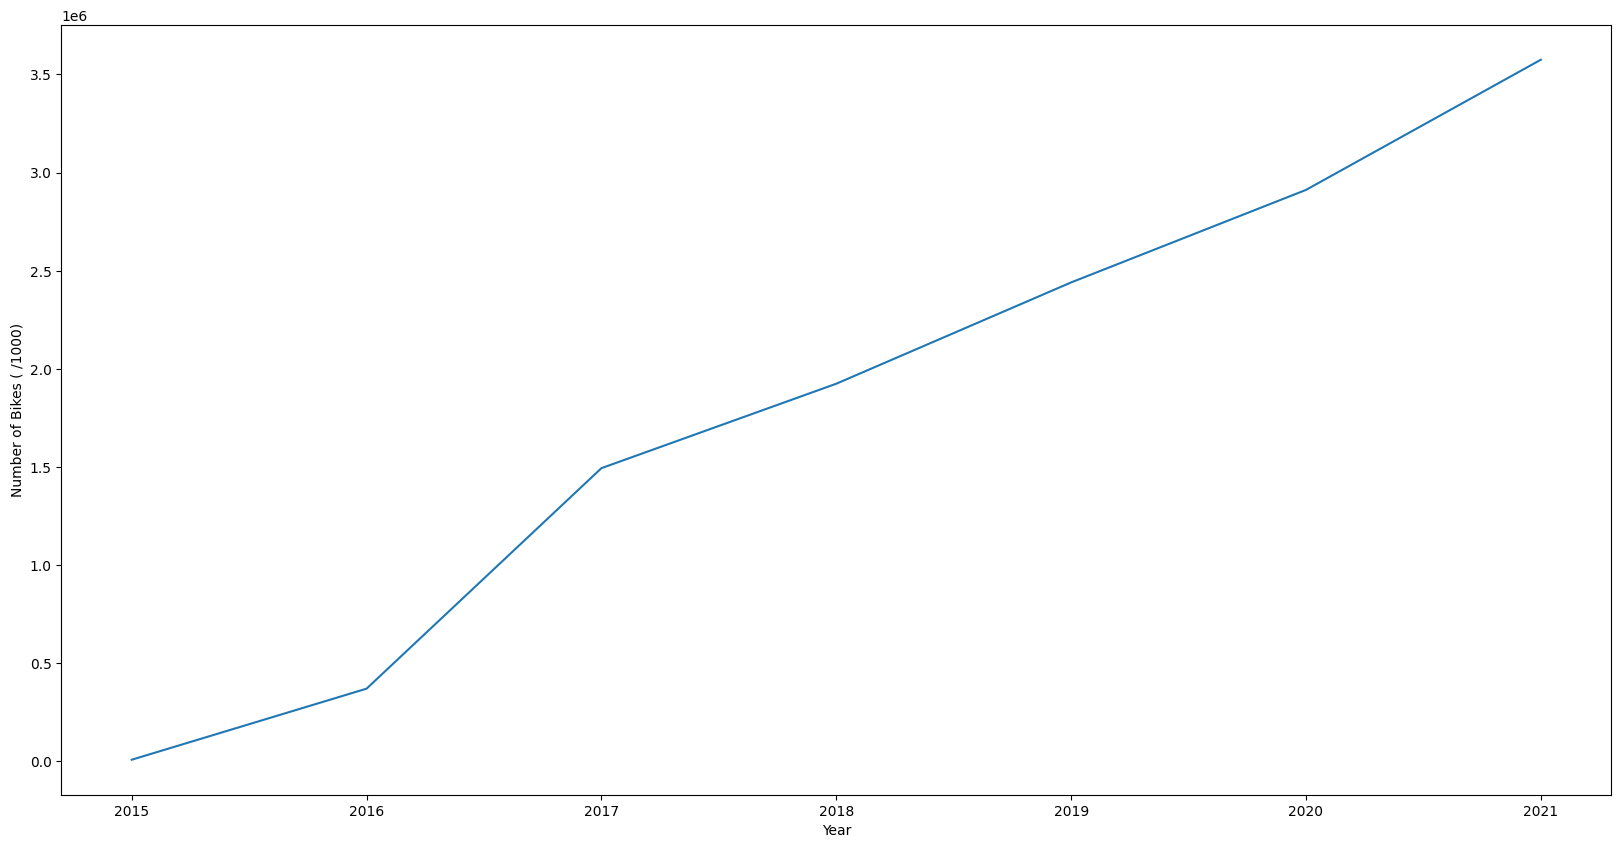

In [84]:
plt.plot(df['Year'].values.tolist(),df['Number of Bikes'].values.tolist())
plt.xlabel('Year')
plt.ylabel('Number of Bikes ( /1000)')

In [97]:
forecast = 3
df['Prediction'] = df["Number of Bikes"].shift(-3)

#X datas4et feautures
#Y datatset is labels

X = np.array(df.drop(['Prediction'],1))
X = preprocessing.scale(X)

X_forecast = X[-forecast:]
X = X[:-forecast]

y = np.array(df['Prediction'])
y = y[:-forecast]


array([1922955., 2439517., 2911308., 3575182.])

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
clf = LinearRegression() #stands for estimator instance classifier
clf.fit(X_train,y_train)

confidence = clf.score(X_test,y_test)
confidence

0.828571492517191

In [113]:
forecast_predicted = clf.predict(X_forecast)
forecast_predicted

array([4023988.47218245, 4452372.52306217, 4968375.79064676])

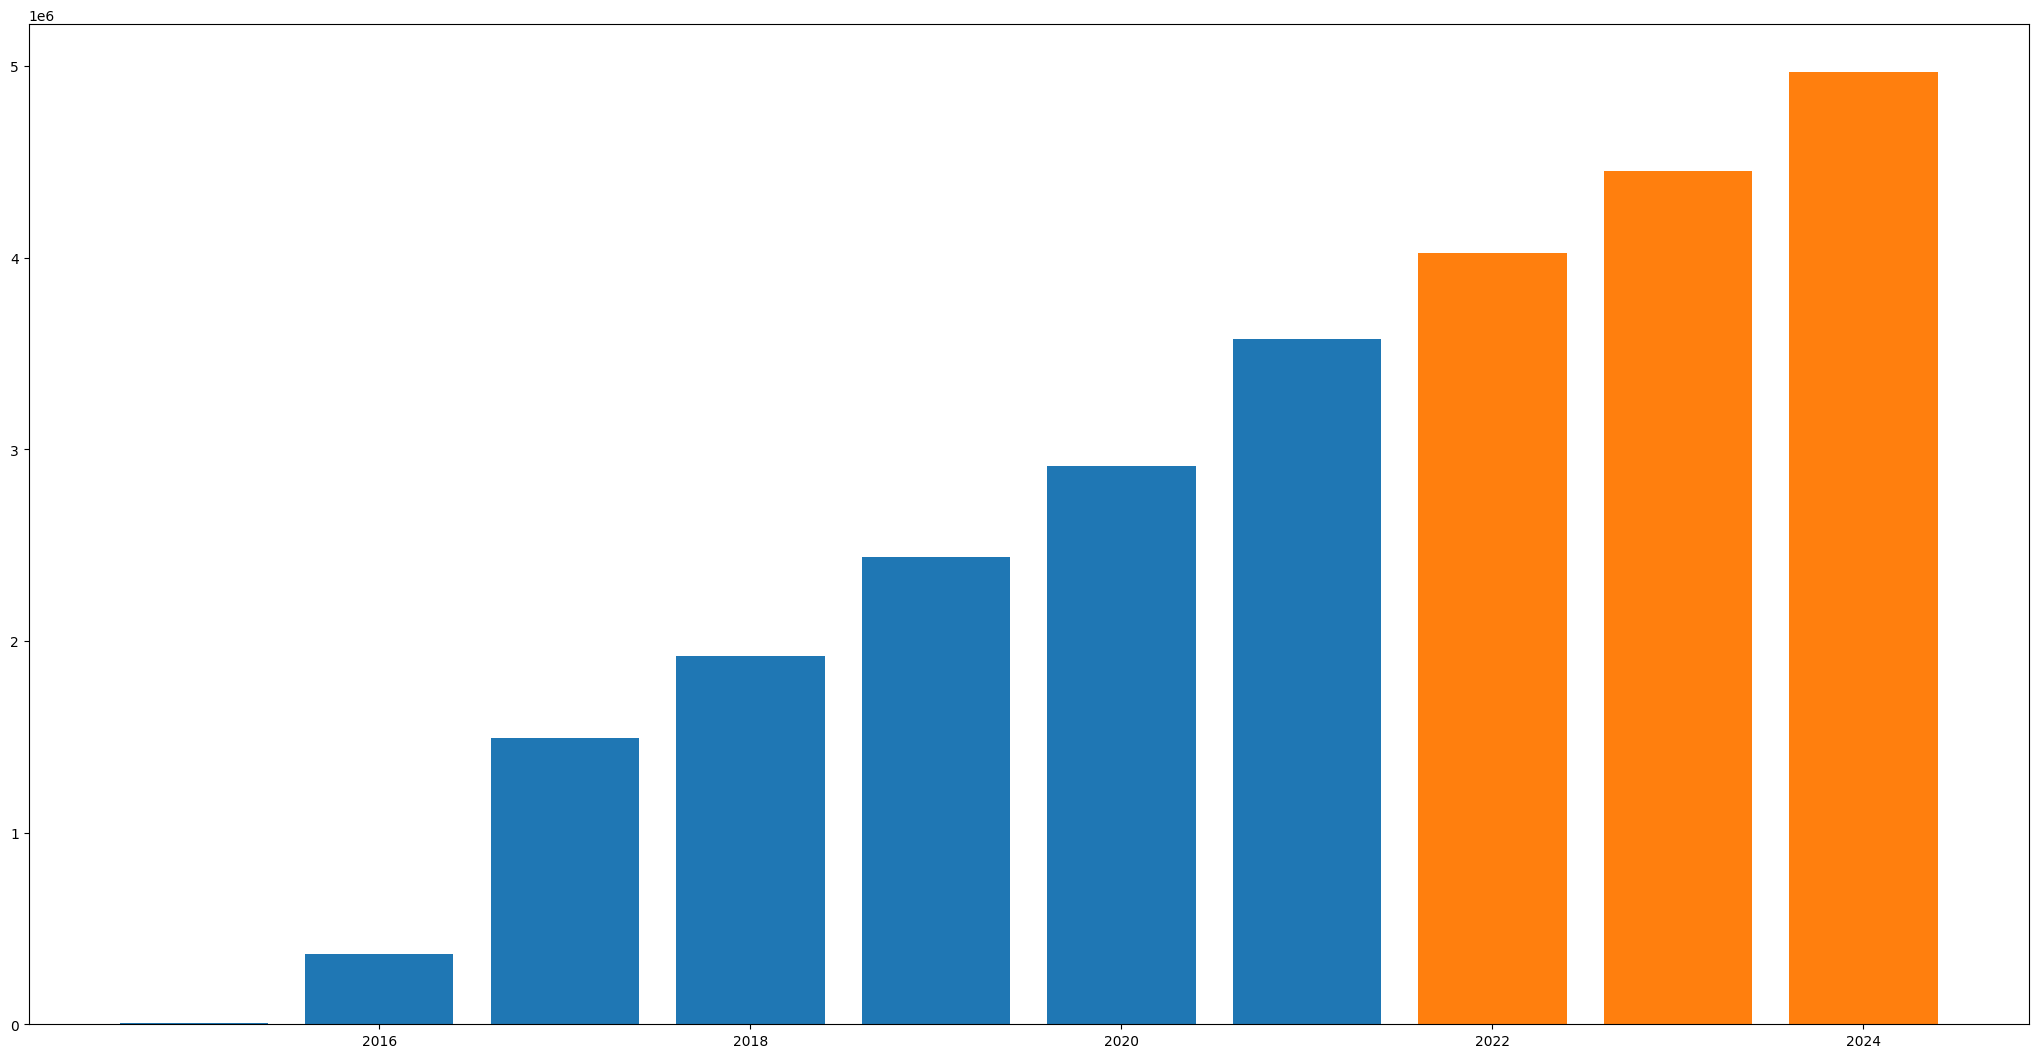

In [119]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = df['Year']
number_of_ppl = df["Number of Bikes"]
ax.bar(langs,number_of_ppl)

pred_year = [2022,2023,2024]
pred_number_of_ppl = forecast_predicted
ax.bar(pred_year,pred_number_of_ppl)
plt.show()

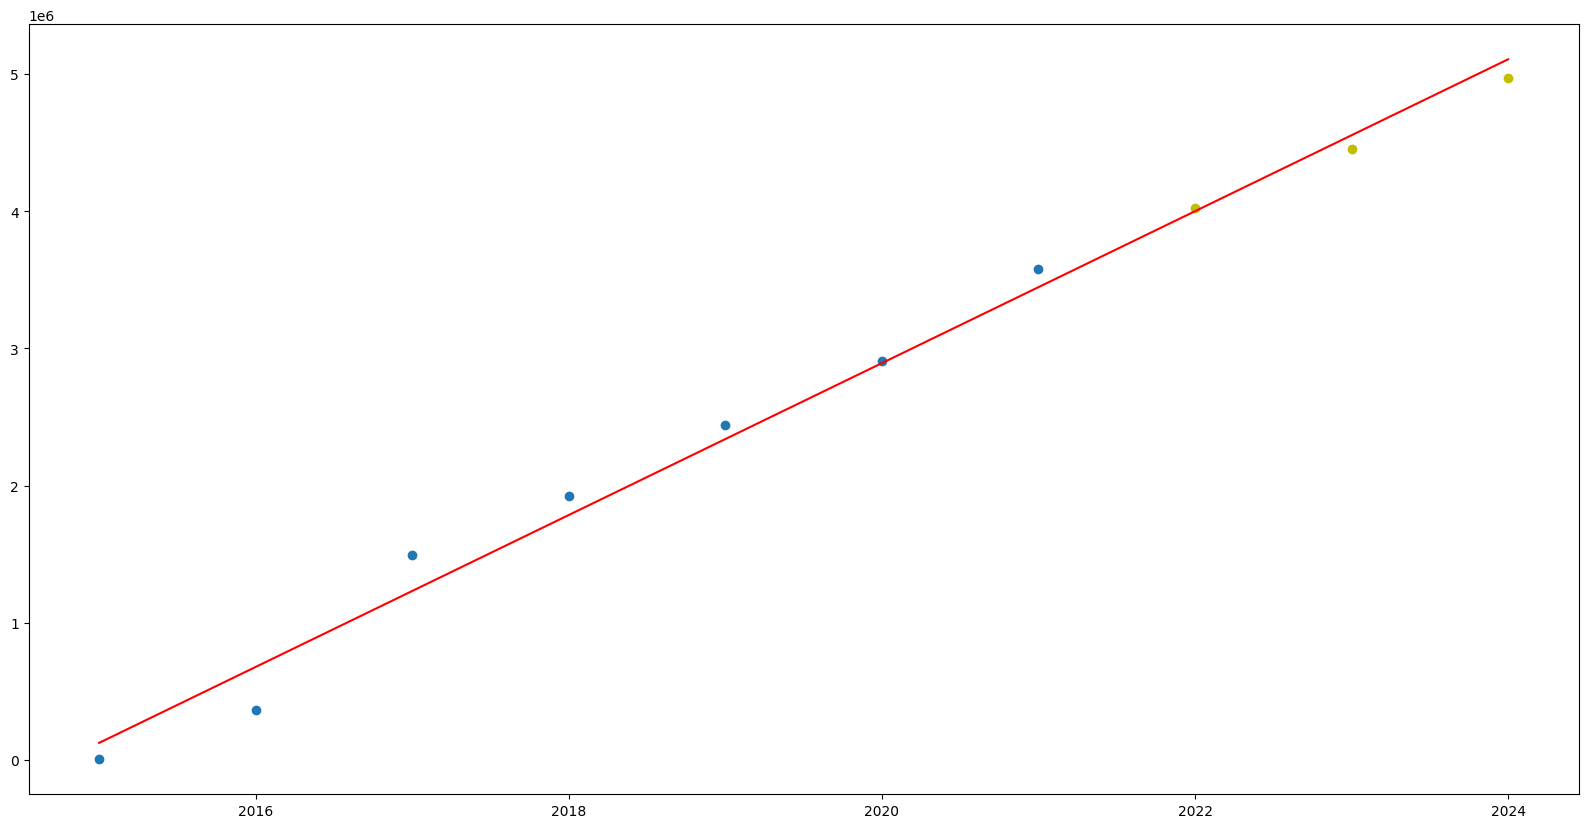

In [153]:
dates = pd.date_range(start='2022', periods=3, freq='Y').year
plt.scatter(dates, forecast_predicted, color="y")
# df["Number of Bikes"].plot(color="g")
plt.scatter(df["Year"],df["Number of Bikes"])

ls = list(df["Number of Bikes"])
ls += list(forecast_predicted)

y = np.array(ls)
x = np.array([2015,2016,2017,2018,2019,2020,2021,2022,2023,2024])
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b,color = "red")

